# **PHYS 481 - Computational Physics II**

## **Assignment #1 - Numerical Differentiation**

### **NAME:** Scott Salmon

### **UCID:** 30093320

### **FILE:** a1_scottsalmon.ipynb

### **DATES:** 2024/09/03 - 2024/09/09


## **PART I: Code and their resulting plots for Questions 1-4 (32 marks)**
## **PART II: Written responses to the following questions (½ page or less for each question)**

In [61]:
#Loading relevant libraries to be used later
import numpy as np
import matplotlib.pyplot as plt

#constants that will be used throughout the assignment
G = 6.67430e-11     #gravitational constant
M = 5.9722e24       #mass of earth
mu = 3.98600440e14  #given constant for more accurate potential energy calculation in question 4
Jtwo = 1.7553e25    #given constant for more accurate potential energy calculation in question 4

def readfile(filename, n_headers):

    '''This function is used to open and read a .txt file generated by the Themis satellite. The desired file to be opened is set to "filename",
        and the number of lines of useless information (such as headers) is set to "n_headers".'''
    
    time, x_pos, y_pos, z_pos = [], [], [], []              #initializing the storage lists that will be used
    
    n = 0   #loop counting variable

    with open(filename, 'r') as input_file:
        for line in input_file:
            if (n<n_headers):                               #this if statement skips all garbage lines, once n=n_headers then data collection begins
                n += 1
            else:
                data = line.split()                         #splits all the data into columns stored in variable data
                t = data[2].split(':')                      #splits hh/mm/ss and stores it into intermediate variable t
                time.append(float(t[0]) + float(t[1])/60)   #calculates time elapsed and adds it to time list
                x_pos.append(float(data[3]))                #storing x, y, z data into their respective lists
                y_pos.append(float(data[4]))
                z_pos.append(float(data[5]))
    return(time,x_pos,y_pos,z_pos)

def radius(x,y,z):

    '''This function is used throughout the code to calculate the distance the satellite is away from the earth by taking the magnitude
        of the individual x, y and z cartesian coordinates.'''
    
    radius_list = []                                                        #initializing storage list
    for i in range(len(x)):
        value = np.sqrt(np.square(x[i])+np.square(y[i])+np.square(z[i]))    #r = sqrt(x^2 + y^2 + z^2)
        radius_list.append(value)
    return radius_list

### **Question 1.1:** Obtaining, Organizing and Plotting the Raw THEMIS-P3 Satellite Data

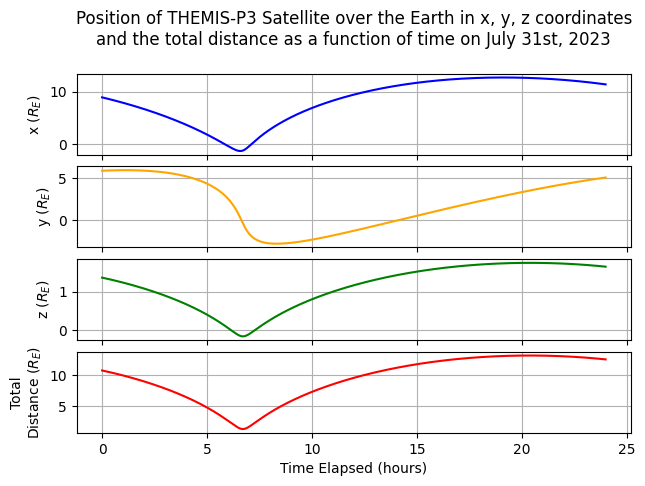

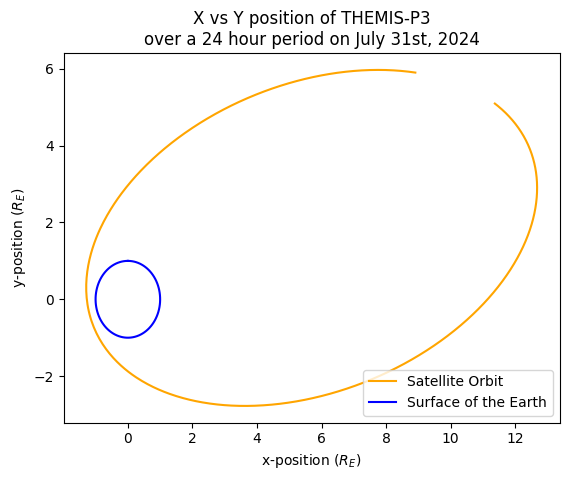

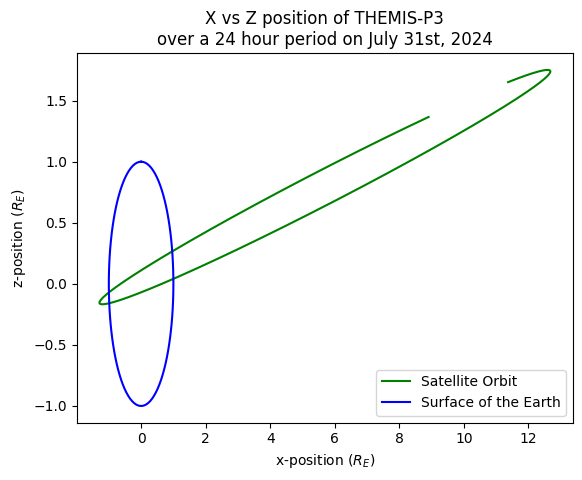

In [62]:
#these three lines are collecting the data from the .txt file and assigning it to variables. also calculating the total distance from earth at all data points
data = np.float_(readfile("orbit_data.txt", 2))                                 
time, x_position, y_position, z_position = data[0], data[1], data[2], data[3]   
position = radius(x_position/6371, y_position/6371, z_position/6371)

#this chunk of code is making the first plot that have the 3 components of position and the combined position (i.e. 4 subplots all in one figure)
fig, ax = plt.subplots(4, sharex=True)
ax[0].set_title('Position of THEMIS-P3 Satellite over the Earth in x, y, z coordinates\nand the total distance as a function of time on July 31st, 2023\n')
ax[0].plot(time, x_position/6371, 'blue')
ax[0].set_ylabel('x ($R_E$)')
ax[0].grid('on')
ax[1].plot(time, y_position/6371, 'orange')
ax[1].set_ylabel('y ($R_E$)')
ax[1].grid('on')
ax[2].plot(time, z_position/6371, 'green')
ax[2].set_ylabel('z ($R_E$)')
ax[2].grid('on')
ax[3].plot(time, position, 'red')
ax[3].set_xlabel('Time Elapsed (hours)')
ax[3].set_ylabel('Total\nDistance ($R_E$)')
ax[3].grid('on')
fig.tight_layout(pad = 0.5)

#this is making two arrays that go from 0-2pi to be used to draw the surface of earth on the plot
earth_x=np.sin(np.linspace(0,2*np.pi,100))
earth_y=np.cos(np.linspace(0,2*np.pi,100))

#this is making the XvsY plot
plt.figure()
plt.title('X vs Y position of THEMIS-P3\nover a 24 hour period on July 31st, 2024')
plt.plot(x_position/6371, y_position/6371, 'orange')
plt.plot(earth_x, earth_y, 'blue')
plt.xlabel('x-position ($R_E$)')
plt.ylabel('y-position ($R_E$)')
plt.legend(['Satellite Orbit', 'Surface of the Earth'], loc='lower right')
plt.show()

#this is making the XvsZ plot
plt.figure()
plt.title('X vs Z position of THEMIS-P3\nover a 24 hour period on July 31st, 2024')
plt.plot(x_position/6371, z_position/6371, 'green')
plt.plot(earth_x, earth_y, 'blue')
plt.xlabel('x-position ($R_E$)')
plt.ylabel('z-position ($R_E$)')
plt.legend(['Satellite Orbit', 'Surface of the Earth'], loc='lower right')
plt.show()

### **Question 2.1:** [4pts] "Convince me that your plots in question 1 show a plausible orbit for THEMIS-D (give 3 good reasons)."

- Using the XvsY plot, we can see that the orbit of the satellite is that of an elliptical shape (as is to be expected). It appears that at 0:00:00, THEMIS is heading towards the Earth. Using the Total Distance plot, we can see that around the 7:00:00 mark, THEMIS reaches the perigee of its orbit and at around the 20:00:00 mark THEMIS reaches the apogee of its orbit. The distances for both can be found using the Total Distance plot, showing us that the apogee occurs at a distance of ~15 $R_E$ and the perigee occuring at a distance of  ~1.5 $R_E$. These values for the apogee and perigee seem reasonable for an elliptical orbit as depicted in the X/Y and X/Z plots.

- Based on the incomplete circles in both XvsY and XvsZ plots, we know that the orbit of the satellite is slightly longer than 24 hours. This seems reasonable and the fact this is shown in both plots shows that the data is consistent. We don't know with certainty that this orbit is periodic, however it looks very likely that it will be considering the direction the path was going at 23:59:00. We can also see that the majority of the orbit's movement occurs along the X/Y plane, and that the orbit is very narrow along the X/Z plane. This again seems very reasonable and points to this data being plausible.

- We can see using the Total Distance plot and also just visually looking at the X/Y and X/Z plots that the satellite never intersects the Earth and that the closest it gets is about 1.5 $R_E$ as mentioned previously in the perigee discussion. Not intersecting with Earth certaintly helps make this data seem more plausible, along with all the aforementioned points.

### **Question 1.2:**  Checking the Conservation of Energy of this Data using a Forward Finite Difference Scheme

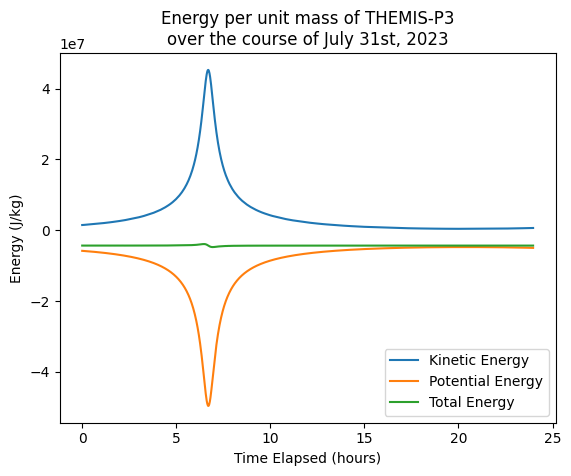

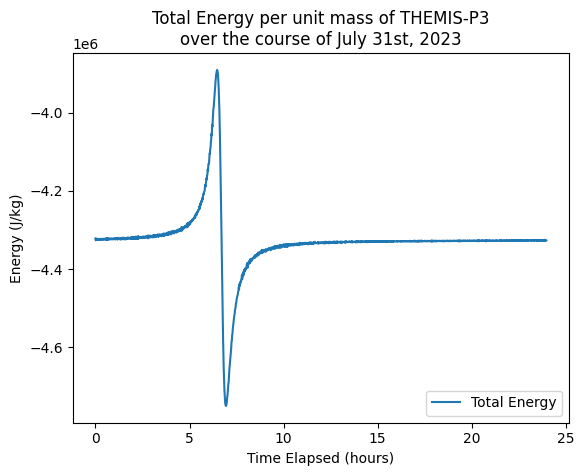

In [63]:
def ffd(distance):

    '''This function is what does the Forward Finite Difference scheme. It is essentially the same structure of a derivative, but with definite differences 
        instead of infinitesimal differences. In this case, its the distance between the two nearby data points for the "rise" and 60 seconds for the "run".
        You only need to input whatever position list that you want to find the derivative (i.e. velocity) list of in the desired direction'''
    
    derivative_list = []
    for n in range(len(distance)-1):                    #-1 because we cannot use the final data point due to the n+1 in the derivative function
        derivative = (distance[n+1]-distance[n])/(60)   #[ (x_(n+1) - x_n) / (t_(n+1) - t_n) ]
        derivative_list.append(derivative)
    return derivative_list

def EK(v_x,v_y,v_z):
    
    '''This function takes in the velocity lists and calculates the Kinetic Energy of the satellite at every
        position'''
    
    EK_list = []
    for i in range(len(v_x)):
        EK_list.append(0.5 * (np.sqrt(v_x[i]**2 + v_y[i]**2 + v_z[i]**2) )**2 )  #0.5*v^2 = Ek/m, sqrt(x^2+y^2+z^2)^2 = v
    return EK_list

def EP(position):
    
    '''This function takes in the positionlists and calculates the Kinetic Energy of the satellite at every position'''
    
    EP_list = []
    for i in range(len(time)):
        EP_list.append(-G*M/position[i])           #-GM/r = Ep
    return EP_list

def ENET(kinetic, potential):

    '''This function takes in both the kinetic and potential energy lists and calculates the net energy at every position'''
    
    net_list = []
    for i in range(len(kinetic)):
        net_list.append(kinetic[i] + potential[i]) #Enet = Ek + Ep
    return net_list

def energy_plotter(time, y1, multi = True, Title = 'string', *args):

    '''This function takes in a time list and then at least one list in the "y-axis". It can take in either 1 y-list or 3 y-lists.
        This function creates the plots used to answer question 2'''
    
    plt.figure()
    plt.xlabel('Time Elapsed (hours)')
    plt.ylabel('Energy (J/kg)')
    plt.title(Title)
    if multi == True:       #if multi is set to true, then multiple y-lists are accepted. Otherwise, only y1 gets plotted
        y2 = args[0]
        y3 = args[1]
        plt.plot(time, y1)
        plt.plot(time, y2)
        plt.plot(time, y3)
        plt.legend(['Kinetic Energy', 'Potential Energy', 'Total Energy'], loc='lower right')
    else:
        plt.plot(time, y1)
        plt.legend(['Total Energy'], loc='lower right')
    plt.show()

distance = radius(x_position*1000, y_position*1000, z_position*1000) #this creates a position list in meters

v_x, v_y, v_z = ffd(x_position*1000), ffd(y_position*1000), ffd(z_position*1000) #this creates velocity lists in the x, y and z directions

kenergy_list = EK(v_x,v_y,v_z)                      #this creates our kinetic energy list
time = time[:-1]                                    #this removes the last element of time because the kinetic list was unable to make the very last element
penergy_list = EP(distance)                         #this makes the potential list, note that since time list is 1 shorter that EP list is now same size as EK list
nenergy_list = ENET(kenergy_list, penergy_list)     #this makes the net energy list by combining the EP and EK lists

energy_plotter(time, kenergy_list, True, 'Energy per unit mass of THEMIS-P3\nover the course of July 31st, 2023', penergy_list, nenergy_list)
energy_plotter(time, nenergy_list, False, 'Total Energy per unit mass of THEMIS-P3\nover the course of July 31st, 2023')

### **Question 1.3:**  Improving the differentiation model through the use of more points

In [64]:
def cfd(distance, time, order='first'):
    
    '''This function is what does the Central Finite Difference scheme. It is essentially the same structure of a derivative, but with definite differences 
        instead of infinitesimal differences. Unlike in the ffd function we defined before, this one has the 4 different "modes" that change the number of points
        taken into account. The "first" one is equivalent to the ffd scheme, "second" takes into account "3" points (with the middle point having a coefficient of 0),
        "third" takes into account "5" points (again with the third point have a coefficient of 0), and "fourth" takes into account "7" points. We then take the average
        of all of these points. This makes the output derivative much less likely to have large and inaccurate fluctuations'''
    
    boolean = True                                              #this boolean variable is saving if whether the potential energy list will need to be clipped or not
    derivative_list = []
    h = (time[1]*3600-time[0]*3600)                             #sets h as the time difference between each point, which will be 60 seconds
    m = 0                                                       #variable that is used to save the amount of clipping required
    if order == 'first':
        
        boolean = False                                         #sets clipping to False
        for n in range(len(distance)-1):                    
            derivative = (distance[n+1]-distance[n])/(h)        #[ (x_(n+1) - x_n) / (t_(n+1) - t_n) ]
            derivative_list.append(derivative)
    
    elif order == 'second':
        m = 1
        n = 1
        while n < (len(distance)-2):                            
            derivative = (distance[n+1]-distance[n-1])/(2*h)    #[ 0.5(x_(n+1) - x_n)/h + 0.5(x_(n) - x_(n-1))/h  ] = [x_(n+1)-x_(n-1)]/2h
            derivative_list.append(derivative)
            n += 1
    
    elif order == 'third':
        m = 2
        n = 2
        while n < (len(distance)-3):
            derivative = (distance[n-2]-8*distance[n-1] + 8*distance[n+1] - distance[n+2])/(12*h)   #[x_(n-2) - 8x_(n-1) + 8x_(n+1) - x_(n+2)]/12h
            derivative_list.append(derivative)
            n += 1
   
    elif order == 'fourth':
        m = 3
        n = 3
        while n < (len(distance)-4):
            #[ -x_(n-3) + 9x_(n-2) - 45x_(n-1) + 45x_(n+1) - 9x_(n+2) +  x_(n+3)]/60h
            derivative = (-distance[n-3] + 9*distance[n-2] - 45*distance[n-1] + 45*distance[n+1] - 9*distance[n+2] + distance[n+3])/(60*h)
            derivative_list.append(derivative)
            n += 1
    return derivative_list, boolean, m
    
def modified_ENET(kinetic, potential, time, clip, m=1): 
    
    '''This function is a modified version of the net energy function in that it includes the ability to clips the time and potential lists to match the kinetic list'''
    
    net_list = []
    dt = time.copy()
    if clip == True:                        #because our kinetic energy cut off a value on each side, we have to make this version match 
        for i in range(m):                  #clips the first and last element of potential and time m times
            del potential[0]
            del potential[-1]
            dt = np.delete(dt, 0)
            dt = np.delete(dt, -1)
        for j in range(len(potential)):
            net_list.append(kinetic[j]+potential[j])
    return(dt, net_list)

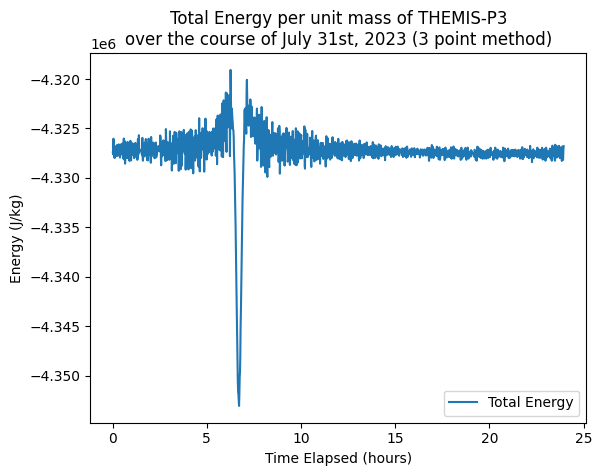

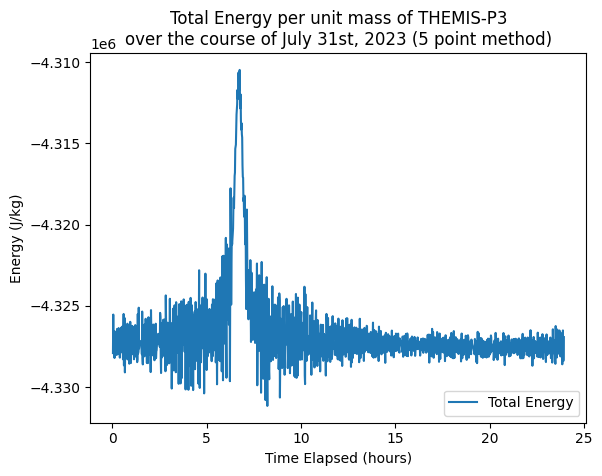

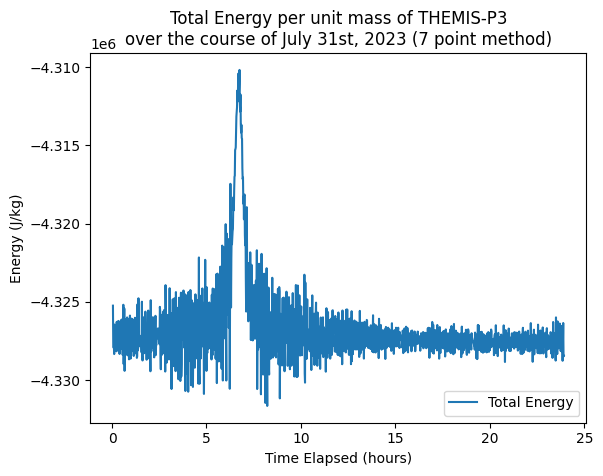

In [65]:
#this block is using the cfd function to generate velocities in the x, y, z directions using the second, third and fourth methods to compare them
v_x2, v_y2, v_z2 = cfd(x_position*1000, time, order='second'), cfd(y_position*1000, time, order='second'), cfd(z_position*1000, time, order='second')
v_x3, v_y3, v_z3 = cfd(x_position*1000, time, order='third'),  cfd(y_position*1000, time, order='third'),  cfd(z_position*1000, time, order='third')
v_x4, v_y4, v_z4 = cfd(x_position*1000, time, order='fourth'), cfd(y_position*1000, time, order='fourth'), cfd(z_position*1000, time, order='fourth')

#this generates kinetic lists for each method so we can compare them
kinetic_list1, kinetic_list2, kinetic_list3 = EK(v_x2[0], v_y2[0], v_z2[0]), EK(v_x3[0], v_y3[0], v_z3[0]), EK(v_x4[0], v_y4[0], v_z4[0])

#this generates potential lists for each method so we can compare them
potential_list2, potential_list3, potential_list4 = EP(distance), EP(distance), EP(distance)

#this generates net energy lists for each method so we can compare them
net_list2 = modified_ENET(kinetic_list1, potential_list2, time, v_x2[1], v_x2[2])
net_list3 = modified_ENET(kinetic_list2, potential_list3, time, v_x3[1], v_x3[2])
net_list4 = modified_ENET(kinetic_list3, potential_list4, time, v_x4[1], v_x4[2])

#this makes all the plots using the energy plotter function defined in question 2
energy_plotter(net_list2[0], net_list2[1], False, 'Total Energy per unit mass of THEMIS-P3\nover the course of July 31st, 2023 (3 point method)')
energy_plotter(net_list3[0], net_list3[1], False, 'Total Energy per unit mass of THEMIS-P3\nover the course of July 31st, 2023 (5 point method)')
energy_plotter(net_list4[0], net_list4[1], False, 'Total Energy per unit mass of THEMIS-P3\nover the course of July 31st, 2023 (7 point method)')

### **Question 2.2:** [4pt] "Is the dominant systematic error when using forward finite differencing (in question 2) due to numerical error or model error? Why?"

- The dominant systematic error when using forward finite differencing is likely due to model error over that of numerical error. This is because for every derivative we're only taking into account the difference between two points, which makes the possibility for large fluctuations much much higher. If there are any outlier data points, or any data points in which the satellite is travelling unusually fast or slow compared to the rest of the data points (such as when the satellite reaches the perigree at around hour 7:00:00), large fluctuations are likely to occur.

- As suggested before, this is what creates the asymptote shape at around hour 7:00:00. In the 2 point method that we did in Question 1.2, we assumed that $x_{n+1} - x_n$ relation created a linear relation between each data point throughout the graph, at points in which that relation is not the same as the rest an asymptote like this can occurs. We need to use a model that takes into account more points to reduce the likelihood of these fluctuations occuring, and to reduce the magnitude of the fluctuations that do occur.

- As we can see by the plots created in question 1.3, the results became much more precise (as is seen on by the increasing amount of digits on the y-axis) when more points were used to take our derivative. In addition, the asymptotes become less dramatic every time we add more points and the total energy value stays closer to its true value.

### **Question 1.4:**  Improving our Gravitational Potential Calculation

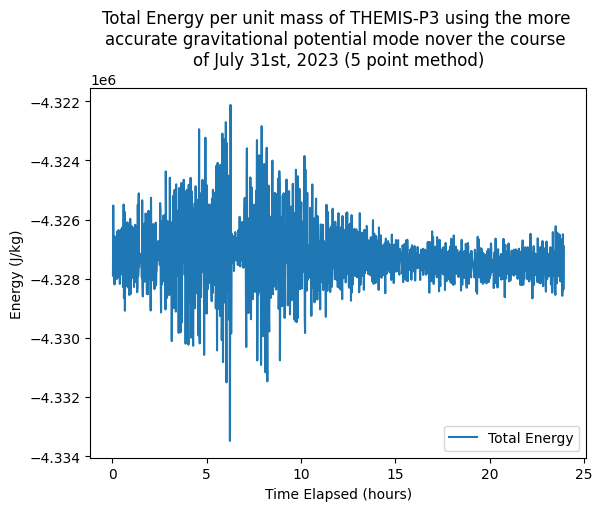

In [66]:
def modified_EP(position, z):
    
    '''This function is a modified version of the original EP function. The original EP equation was assuming that the Earth was a perfect sphere, this method is a more
        accurate calculation '''
        
    EP_list = []
    for i in range(len(time)):
        EP_list.append( (-mu/position[i]) + (Jtwo / (2*position[i]**5)) * (3*z[i]**2 - position[i]**2) ) #phi = -mu/r J_2/2r^5 (3z^2 -r^2)
    return EP_list

kinetic_list = EK(v_x3[0], v_y3[0], v_z3[0])
potential_list = modified_EP(distance, z_position*1000)
net_list = modified_ENET(kinetic_list, potential_list, time, v_x3[1], v_x3[2])

energy_plotter(net_list[0], net_list[1], False, 'Total Energy per unit mass of THEMIS-P3 using the more \naccurate gravitational potential mode nover the course \nof July 31st, 2023 (5 point method)')

### **Question 2.3:** [4 pts] "Does the data support the conclusion that the Earth’s mass distribution is slightly non-spherical?"

- I would say that the data does support the conclusion that the Earth's mass distribution is slightly non-spherical. The asymptote that occurs at the perigee is by far the lowest of all of the plots generated throughout this assignment. This is especially significant when we compare this plot to the 5 point method done in question 1.3, as both figures used the same differentiation process to calculate the kinetic energy, meaning the only difference between the two is solely due to the potential energy calculations which evidently improved the net energy calculation substantially.

- Also all of the data points are much closer together, and we can see that the total energy is about -4.327 J/kg. That assumption could've been made with the previous figures, but with this method it's even more exaggerated and precise.

- This aligns with the statement that "3 or 5 point [central finite difference] stencils are common workhorses [and] beyond that you usually needs more points". In this case, we didn't add more points but we instead improved the accuracy of our points using a more accurate model, which improved the final result more then improving the derivative method. This aligns with the idea that after a certain point, improving your data quality is much more important then just using a more complicated derivative method.